In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [38]:
file = pd.read_csv("/home/steffi/Documents/storm_orig/bound.csv")
file

date                   model    learn heuristic         1  \
0   09-03-2022 11:06:18  working_models/rabin.5  genetic    module  0.000061   
1   09-03-2022 11:08:32  working_models/rabin.5  genetic    module  0.015625   
2   09-03-2022 11:08:38  working_models/rabin.5  genetic    module  0.001953   
3   09-03-2022 11:08:47  working_models/rabin.5  genetic    module  0.000061   
4   09-03-2022 11:08:51  working_models/rabin.5  genetic    module  0.007812   
..                  ...                     ...      ...       ...       ...   
85  09-03-2022 14:36:23     working_models/test     none      none  0.000000   
86  09-03-2022 14:36:39     working_models/test     none      none  0.000000   
87  09-03-2022 14:37:00     working_models/test     none      none  0.000000   
88  09-03-2022 14:37:59     working_models/test  genetic    module  0.000000   
89  09-03-2022 15:10:32     working_models/test  genetic    module  0.000000   

           2         3         4         5         6  ...  3990  3991  3992  \
0   0.001953  0.001953  0.001953  0.250000  0.250000  ...   NaN   NaN   NaN   
1   0.015625  0.250000  0.250000  0.250000  0.250000  ...   NaN   NaN   NaN   
2   0.001953  0.001953  0.001953  0.001968  0.062622  ...   NaN   NaN   NaN   
3   0.001953  0.007812  0.062500  0.062500  0.062500  ...   NaN   NaN   NaN   
4   0.007812  0.007812  0.062500  0.062500  0.064453  ...   NaN   NaN   NaN   
..       ...       ...       ...       ...       ...  ...   ...   ...   ...   
85  0.000000  0.000000  0.000000  0.000000  0.000000  ...   NaN   NaN   NaN   
86  0.000000  0.000000  0.000000  0.000000  0.000000  ...   NaN   NaN   NaN   
87  0.000000  0.000000  0.000000  0.000000  0.000000  ...   NaN   NaN   NaN   
88  0.000000  0.000000  0.000000  0.000000  0.031250  ...   NaN   NaN   NaN   
89  0.000000  0.000000  0.000000  0.000000  0.000000  ...   NaN   NaN   NaN   

    3993  3994  3995  3996  3997  3998  3999  
0    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
..   ...   ...   ...   ...   ...   ...   ...  
85   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
86   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
87   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
88   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
89   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[90 rows x 4003 columns]

In [16]:
for x in file.loc[file["model"]=="working_models/rabin.5"].loc[file["learn"]=="genetic"]:


date
model
learn
heuristic
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
2

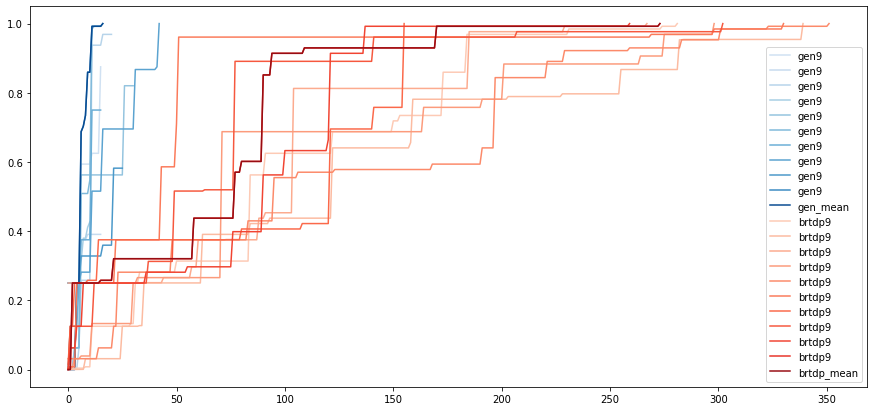

In [33]:
plt.figure(figsize=(15,7))
cmap = plt.get_cmap(name="Blues", lut=None)
cum = []
maxsize = 0
lines = file.loc[file["model"]=="working_models/rabin.5"].loc[file["learn"]=="genetic"]
for index, row in lines.iterrows():
    arr = np.array(np.array(row)[4:],dtype=float)
    arr = arr[np.logical_not(np.isnan(arr))]
    if arr[1]!=1:
        np.append(arr,1)
    cum.append(arr)
    if len(arr)>maxsize:
        maxsize = len(arr)
    plt.plot(arr, color=cmap(0.2+0.05*(index%10)),label="gen"+str(i))
summ = np.zeros(maxsize)
for arr in cum:
    summ[:len(arr)] += arr
summ /= 10
plt.plot(arr, color=cmap(0.9),label="gen_mean")

lines = file.loc[file["model"]=="working_models/rabin.5"].loc[file["learn"]=="none"]
cmap = plt.get_cmap(name="Reds", lut=None)
cum = []
maxsize = 0
for index, row in lines.iterrows():
    arr = np.array(np.array(row)[4:],dtype=float)
    arr = arr[np.logical_not(np.isnan(arr))]
    cum.append(arr)
    if len(arr)>maxsize:
        maxsize = len(arr)
    plt.plot(arr, color=cmap(0.2+0.05*(index%10)),label="brtdp"+str(i))
summ = np.zeros(maxsize)
for arr in cum:
    summ[:len(arr)] += arr
summ /= 10
plt.plot(arr, color=cmap(0.9),label="brtdp_mean")

plt.legend()
plt.show()

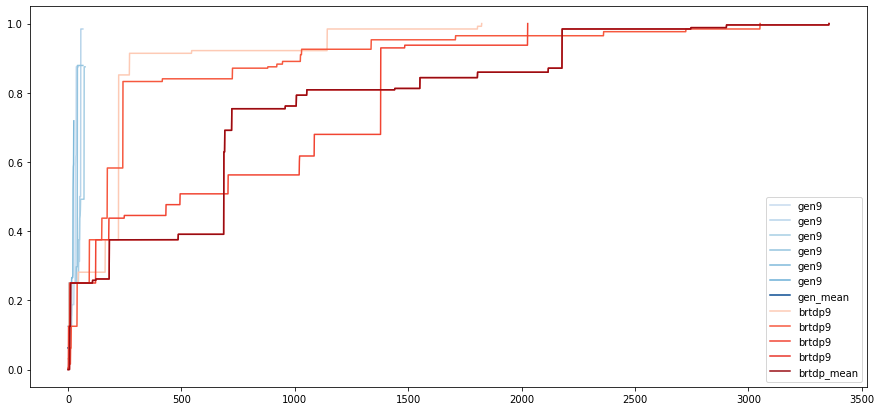

In [45]:
plt.figure(figsize=(15,7))
cmap = plt.get_cmap(name="Blues", lut=None)
cum = []
maxsize = 0
lines = file.loc[file["model"]=="working_models/rabin.10"].loc[file["learn"]=="genetic"]
for index, row in lines.iterrows():
    arr = np.array(np.array(row)[4:],dtype=float)
    arr = arr[np.logical_not(np.isnan(arr))]
    if arr[-1]!=1:
        np.append(arr,1)
    cum.append(arr)
    if len(arr)>maxsize:
        maxsize = len(arr)
    plt.plot(arr, color=cmap(0.2+0.05*(index%10)),label="gen"+str(i))
summ = np.zeros(maxsize)
for arr in cum:
    summ[:len(arr)] += arr
summ /= 10
plt.plot(arr, color=cmap(0.9),label="gen_mean")

lines = file.loc[file["model"]=="working_models/rabin.10"].loc[file["learn"]=="none"]
cmap = plt.get_cmap(name="Reds", lut=None)
cum = []
maxsize = 0
for index, row in lines.iterrows():
    arr = np.array(np.array(row)[4:],dtype=float)
    arr = arr[np.logical_not(np.isnan(arr))]
    cum.append(arr)
    if len(arr)>maxsize:
        maxsize = len(arr)
    plt.plot(arr, color=cmap(0.2+0.05*(index%10)),label="brtdp"+str(i))
summ = np.zeros(maxsize)
for arr in cum:
    summ[:len(arr)] += arr
summ /= 10
plt.plot(arr, color=cmap(0.9),label="brtdp_mean")

plt.legend()
plt.show()

0.125


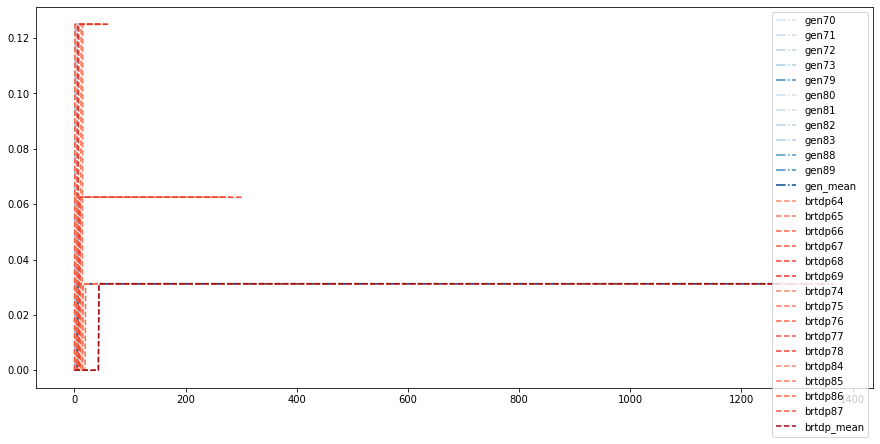

In [57]:
plt.figure(figsize=(15,7))
maxval = 0.0
cmap = plt.get_cmap(name="Blues", lut=None)
cum = []
maxsize = 0
lines = file.loc[file["model"]=="working_models/test"].loc[file["learn"]=="genetic"]
for index, row in lines.iterrows():
    arr = np.array(np.array(row)[4:],dtype=float)
    arr = arr[np.logical_not(np.isnan(arr))]
    cum.append(arr)
    if len(arr)>maxsize:
        maxsize = len(arr)
    if np.max(arr)>maxval:
        maxval = np.max(arr)
    plt.plot(arr, color=cmap(0.2+0.05*(index%10)),label="gen"+str(index), linestyle='dashdot')
summ = np.zeros(maxsize)
for arr in cum:
    summ[:len(arr)] += arr
summ /= 10
plt.plot(arr, color=cmap(0.9),label="gen_mean", linestyle='dashdot')

lines = file.loc[file["model"]=="working_models/test"].loc[file["learn"]=="none"]
cmap = plt.get_cmap(name="Reds", lut=None)
cum = []
maxsize = 0
for index, row in lines.iterrows():
    arr = np.array(np.array(row)[4:],dtype=float)
    arr = arr[np.logical_not(np.isnan(arr))]
    if len(arr)<2:
        continue
    cum.append(arr)
    if len(arr)>maxsize:
        maxsize = len(arr)
    if np.max(arr)>maxval:
        maxval = np.max(arr)
        print(2,arr)
    plt.plot(arr, color=cmap(0.2+0.05*(index%10)),label="brtdp"+str(index), linestyle='dashed')
summ = np.zeros(maxsize)
for arr in cum:
    summ[:len(arr)] += arr
summ /= 10
plt.plot(arr, color=cmap(0.9),label="brtdp_mean", linestyle='dashed')
print(maxval)
plt.legend()
plt.show()